In [1]:
path = "../datasets/"
file = "ruido_en_breast_cancer_0.75.csv"

import pandas as pd

df  = pd.read_csv(path+file)
df["Valores donde hay ruido"].mean()

0.7486818980667839

In [2]:
from pathlib import Path
def lista(path):
    print(path)
    for p in path.iterdir():
        if p.is_dir():
            print(espacio,p.name,": carpeta",sep="")
        else:
            if p.is_file() and p.suffix==".csv":
                df  = pd.read_csv(p)
                print(p, round(df["Valores donde hay ruido"].mean(),2))
    print("="*40)

path = "../datasets/"
lista(Path(path))

..\datasets
..\datasets\ruido_en_breast_cancer_0.15.csv 0.15
..\datasets\ruido_en_breast_cancer_0.3.csv 0.3
..\datasets\ruido_en_breast_cancer_0.45.csv 0.45
..\datasets\ruido_en_breast_cancer_0.6.csv 0.6
..\datasets\ruido_en_breast_cancer_0.75.csv 0.75
..\datasets\ruido_en_chinese_mnist_0.15.csv 0.15
..\datasets\ruido_en_chinese_mnist_0.3.csv 0.3
..\datasets\ruido_en_chinese_mnist_0.45.csv 0.45
..\datasets\ruido_en_chinese_mnist_0.6.csv 0.6
..\datasets\ruido_en_chinese_mnist_0.75.csv 0.75
..\datasets\ruido_en_digits_dataset_0.15.csv 0.15
..\datasets\ruido_en_digits_dataset_0.3.csv 0.3
..\datasets\ruido_en_digits_dataset_0.45.csv 0.45
..\datasets\ruido_en_digits_dataset_0.6.csv 0.6
..\datasets\ruido_en_digits_dataset_0.75.csv 0.75
..\datasets\ruido_en_gamma_telescope_0.15.csv 0.15
..\datasets\ruido_en_gamma_telescope_0.3.csv 0.3
..\datasets\ruido_en_gamma_telescope_0.45.csv 0.45
..\datasets\ruido_en_gamma_telescope_0.6.csv 0.6
..\datasets\ruido_en_gamma_telescope_0.75.csv 0.75
..\datase

In [3]:
def load_breast_cancer():
    import pandas as pd
    from sklearn.datasets import load_breast_cancer
    cancer = load_breast_cancer()
    df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
    df["label"] = cancer.target
    return df

df = load_breast_cancer()

In [4]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
df.label.unique()

array([0, 1])

## Sin ruido

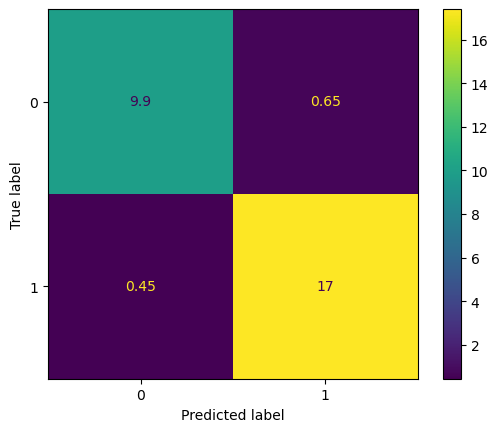

Kappa de Cohen promedio: 0.9169119212816325


In [21]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import numpy as np

from sklearn.model_selection import train_test_split

def prueba(df,k=10):

    yColumn = "label"  
    XColumns = [c for c in df.columns if c!=yColumn] # una lista de columnas: las X, las características, las features, las dimensiones...

    X = df[XColumns]
    y = df[yColumn]

    skf = StratifiedKFold(n_splits=k, shuffle=True)

    # Inicializar matriz de confusión acumulada y lista de kappa
    conf_matrix_total = np.zeros((len(np.unique(y)), len(np.unique(y))))
    kappa_scores = []

    # Modelo de clasificación
    model = RandomForestClassifier()
    X = df[XColumns]
    y = df[yColumn]

    # Loop sobre los folds
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Entrenar modelo
        model.fit(X_train, y_train)

        # Predicción
        y_pred = model.predict(X_test)

        # Calcular matriz de confusión y kappa
        conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_total += conf_matrix
        kappa_scores.append(cohen_kappa_score(y_test, y_pred))

    # Kappa promedio
    kappa_mean = np.mean(kappa_scores)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_total/k ,
                                  display_labels=model.classes_)
    disp.plot()

    plt.show()

    print("Kappa de Cohen promedio:", kappa_mean)

    
prueba(df,k=20)    

## Con ruido

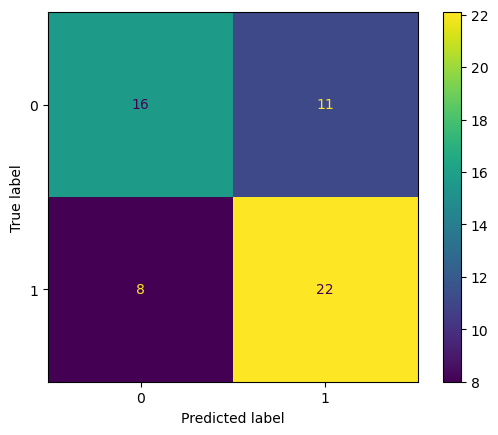

Kappa de Cohen promedio: 0.32235964059506733


In [17]:
path = "../datasets/"
file = "ruido_en_breast_cancer_0.3.csv"

import pandas as pd

dfR  = pd.read_csv(path+file)
df2 = df.copy()
df2["label"] = dfR["Etiquetas con ruido"]
prueba(df2)    

In [8]:
dfR

,Etiquetas con ruido,Valores donde hay ruido
0,0,False
1,0,False
2,0,False
3,0,False
4,0,False
...,...,...
564,1,True
565,1,True
566,0,False
567,0,False


## Buscamos ruido

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier  # Puedes cambiar el modelo
from sklearn.preprocessing import LabelEncoder


def name_col(c):
    return f"c_{c}"

def busca_ruido(df,k=10,n=10):
    yColumn = "label"  
    XColumns = [c for c in df.columns if c!=yColumn] # una lista de columnas: las X, las características, las features, las dimensiones...

    # Modelo de clasificación
    model = RandomForestClassifier()
    X = df[XColumns]
    y = df[yColumn]
    
    # Inicializar matriz de confusión acumulada y lista de kappa
    conf_matrix_total = np.zeros((len(np.unique(y)), len(np.unique(y))))
    kappa_scores = []

    cols = {}
    for v in y.unique():
        cols[name_col(v)] = [0] * len(df) 

    results = pd.DataFrame(cols)

    for _ in range(n):
        skf = StratifiedKFold(n_splits=k, shuffle=True)

        # Loop sobre los folds
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Entrenar modelo
            model.fit(X_train, y_train)

            # Predicción
            y_pred = model.predict(X_test)

            for i in range(len(y_pred)):
                results.loc[test_index[i],name_col(y_pred[i])] +=1 

            # Calcular matriz de confusión y kappa
            conf_matrix = confusion_matrix(y_test, y_pred)
            conf_matrix_total += conf_matrix
            kappa_scores.append(cohen_kappa_score(y_test, y_pred))

    # Kappa promedio
    kappa_mean = np.mean(kappa_scores)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_total/len(kappa_scores) ,
                                  display_labels=model.classes_)
    disp.plot()

    plt.show()

    # Mostrar resultados
    print("Kappa de Cohen promedio:", kappa_mean)
    return results/len(kappa_scores)*k


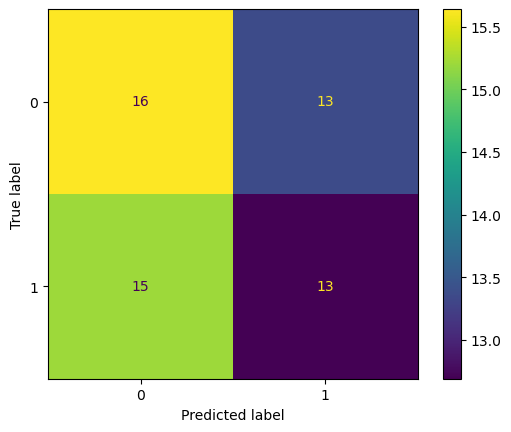

Kappa de Cohen promedio: -0.0057785823679782225


In [10]:
results = busca_ruido(df2)

In [11]:
df.label

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

In [12]:

def prediccion(results):
   return results.idxmax(axis=1).str[2:].astype("int")
    

preds = prediccion(results)

cohen_kappa_score(df.label, preds)

0.3027002066152398

In [13]:
results["label"] = df.label
results["pred_label"] = preds
results["pred_ruido"] = preds!=df2.label
results["Valores donde hay ruido"] = dfR["Valores donde hay ruido"]
results["Etiquetas con ruido"] = dfR["Etiquetas con ruido"]


results.sample(500)

,c_0,c_1,label,pred_label,pred_ruido,Valores donde hay ruido,Etiquetas con ruido
169,0.1,0.9,1,1,True,True,0
523,0.3,0.7,1,1,False,False,1
480,0.6,0.4,1,0,True,False,1
67,0.7,0.3,1,0,True,False,1
15,1.0,0.0,0,0,True,True,1
...,...,...,...,...,...,...,...
551,0.0,1.0,1,1,True,True,0
524,0.1,0.9,1,1,False,False,1
301,0.1,0.9,1,1,True,True,0
45,0.9,0.1,0,0,False,False,0


# versión galo

In [14]:

cohen_kappa_score(results["Valores donde hay ruido"], results.pred_ruido)

0.2725358071509304

# buscando ruido en el dataset original

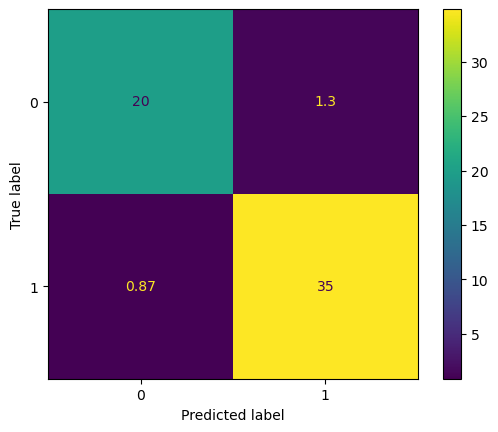

Kappa de Cohen promedio: 0.9170171697717148


In [15]:
results = busca_ruido(df)

In [16]:
def prediccion(results):
   return results.idxmax(axis=1).str[2:].astype("int")
    

preds = prediccion(results)

cohen_kappa_score(df.label, preds)

0.9208324223330882